In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_excel('premiums_rest.xlsx')
df.head(3)

,Unnamed: 0,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


### Modyfying Column Names

In [3]:
df.columns=df.columns.str.replace(' ',"_").str.lower()

In [4]:
df.head(3)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


### Handling NA Values

In [5]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000
mean,25027.094091,43.396105,2.379910,23.364184,20892.303821
std,14432.632929,13.412657,1.431201,24.740339,6936.813440
min,0.000000,26.000000,-3.000000,1.000000,3625.000000
25%,12599.250000,34.000000,1.000000,7.000000,15697.250000
50%,25067.500000,42.000000,3.000000,17.000000,20489.000000
75%,37563.750000,52.000000,3.000000,32.000000,26360.000000
max,49999.000000,356.000000,5.000000,930.000000,43471.000000


In [10]:
df[df.number_of_dependants<0].shape
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3])

In [11]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

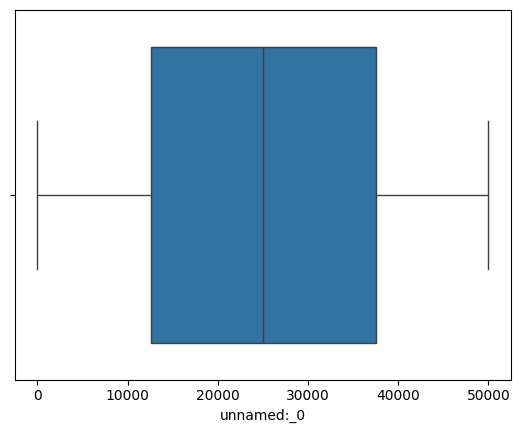

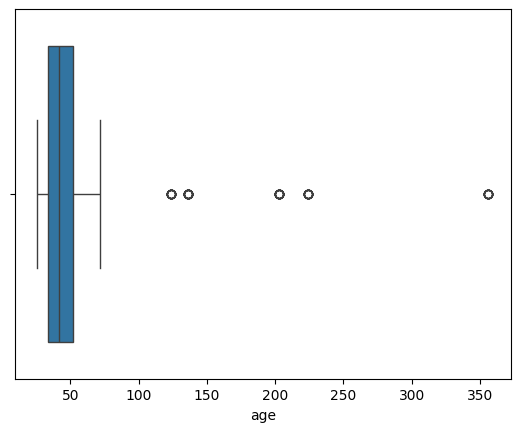

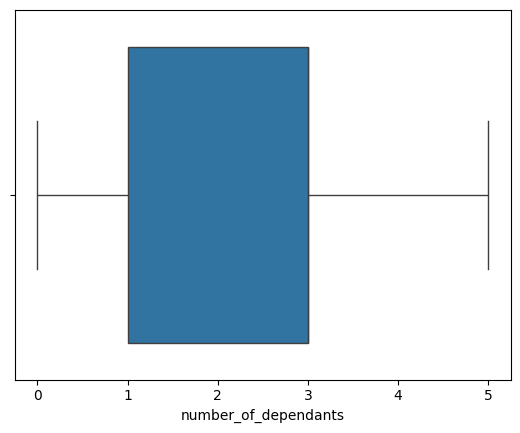

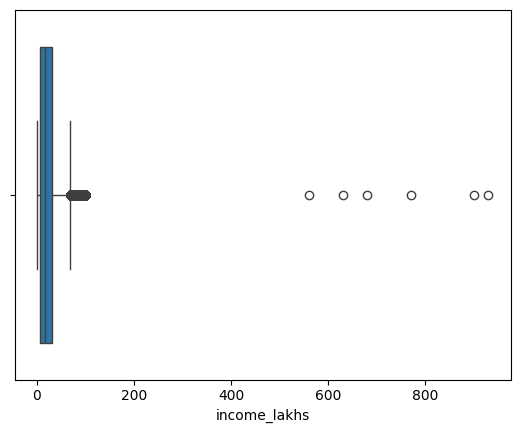

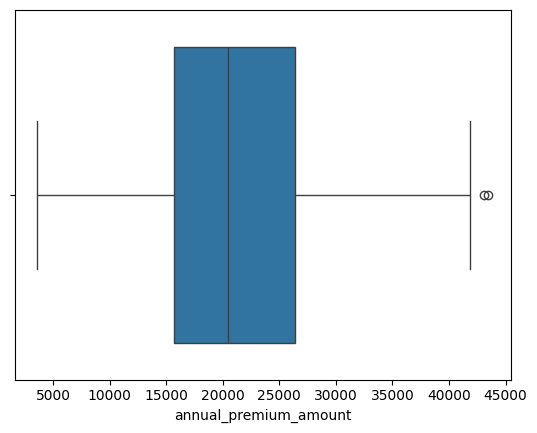

In [12]:
numerix_columns=df.select_dtypes(['float64','int64']).columns
for col in numerix_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [13]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [14]:
df1=df[df.age<100].copy()
df1.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.000000
mean,25028.882091,43.095380,2.387790,23.371530,20901.900563
std,14431.843528,11.041991,1.420641,24.751262,6928.457636
min,0.000000,26.000000,0.000000,1.000000,6538.000000
25%,12599.750000,34.000000,1.000000,7.000000,15706.000000
50%,25068.500000,42.000000,3.000000,17.000000,20496.000000
75%,37564.500000,52.000000,3.000000,32.000000,26361.000000
max,49999.000000,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

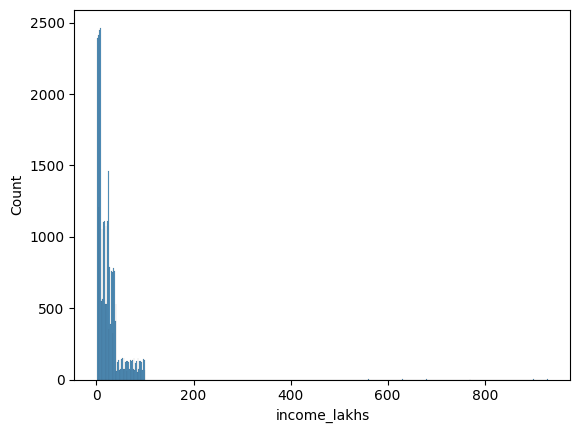

In [15]:
sns.histplot(df1.income_lakhs)

In [16]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

In [17]:
def get_iqr_bounds(col):
    Q1,Q3=df.income_lakhs.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3 + 1.5*IQR
    return lower_bound,upper_bound

In [18]:
quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [19]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,25030.357152,43.094896,2.387734,23.226343,20900.689223
std,14431.397026,11.042430,1.420644,22.455408,6928.192115
min,0.000000,26.000000,0.000000,1.000000,6538.000000
25%,12605.250000,34.000000,1.000000,7.000000,15705.250000
50%,25070.000000,42.000000,3.000000,17.000000,20495.500000
75%,37565.500000,52.000000,3.000000,32.000000,26360.000000
max,49999.000000,72.000000,5.000000,100.000000,43471.000000


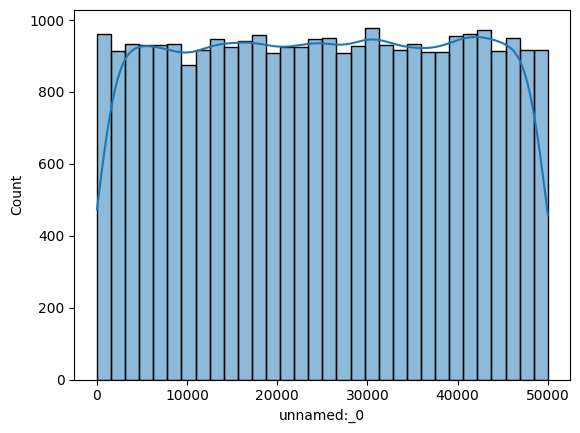

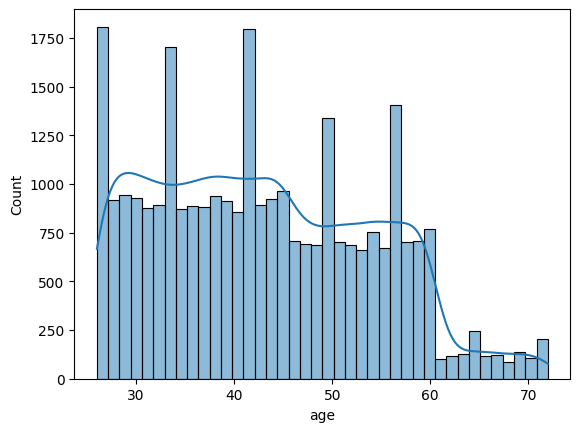

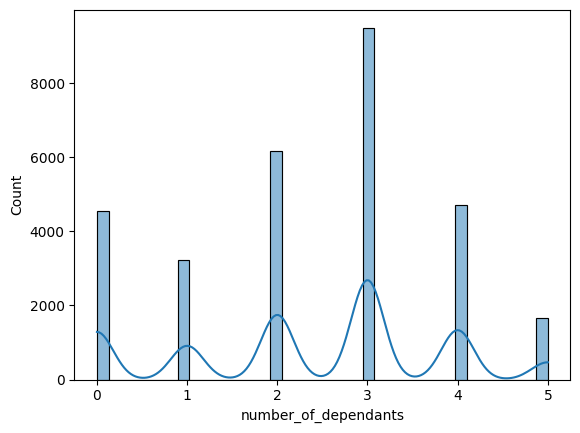

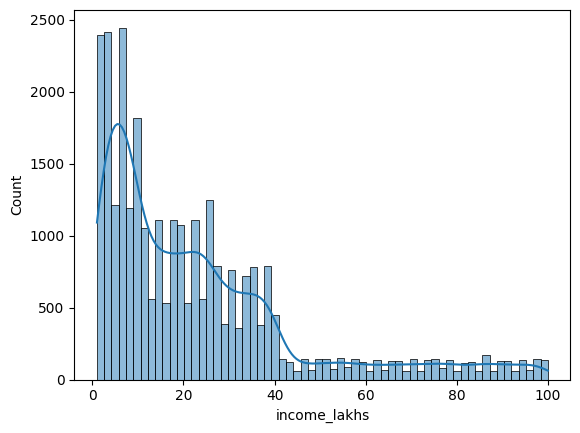

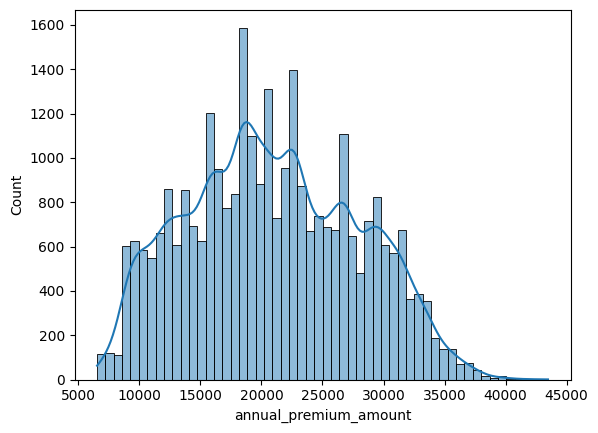

In [20]:
for col in numerix_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

In [21]:
categorical_col=df2.drop(['age','number_of_dependants','income_lakhs','annual_premium_amount'],axis='columns').columns.to_list()


In [22]:
for col in categorical_col:
    print(col,df2[col].unique())

unnamed:_0 [    0     1     2 ... 49992 49996 49999]
gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [23]:
df2.replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking',},inplace=True)

In [24]:
for col in categorical_col:
    print(col,df2[col].unique())

unnamed:_0 [    0     1     2 ... 49992 49996 49999]
gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [25]:
df2['gender'].value_counts(normalize=True)

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

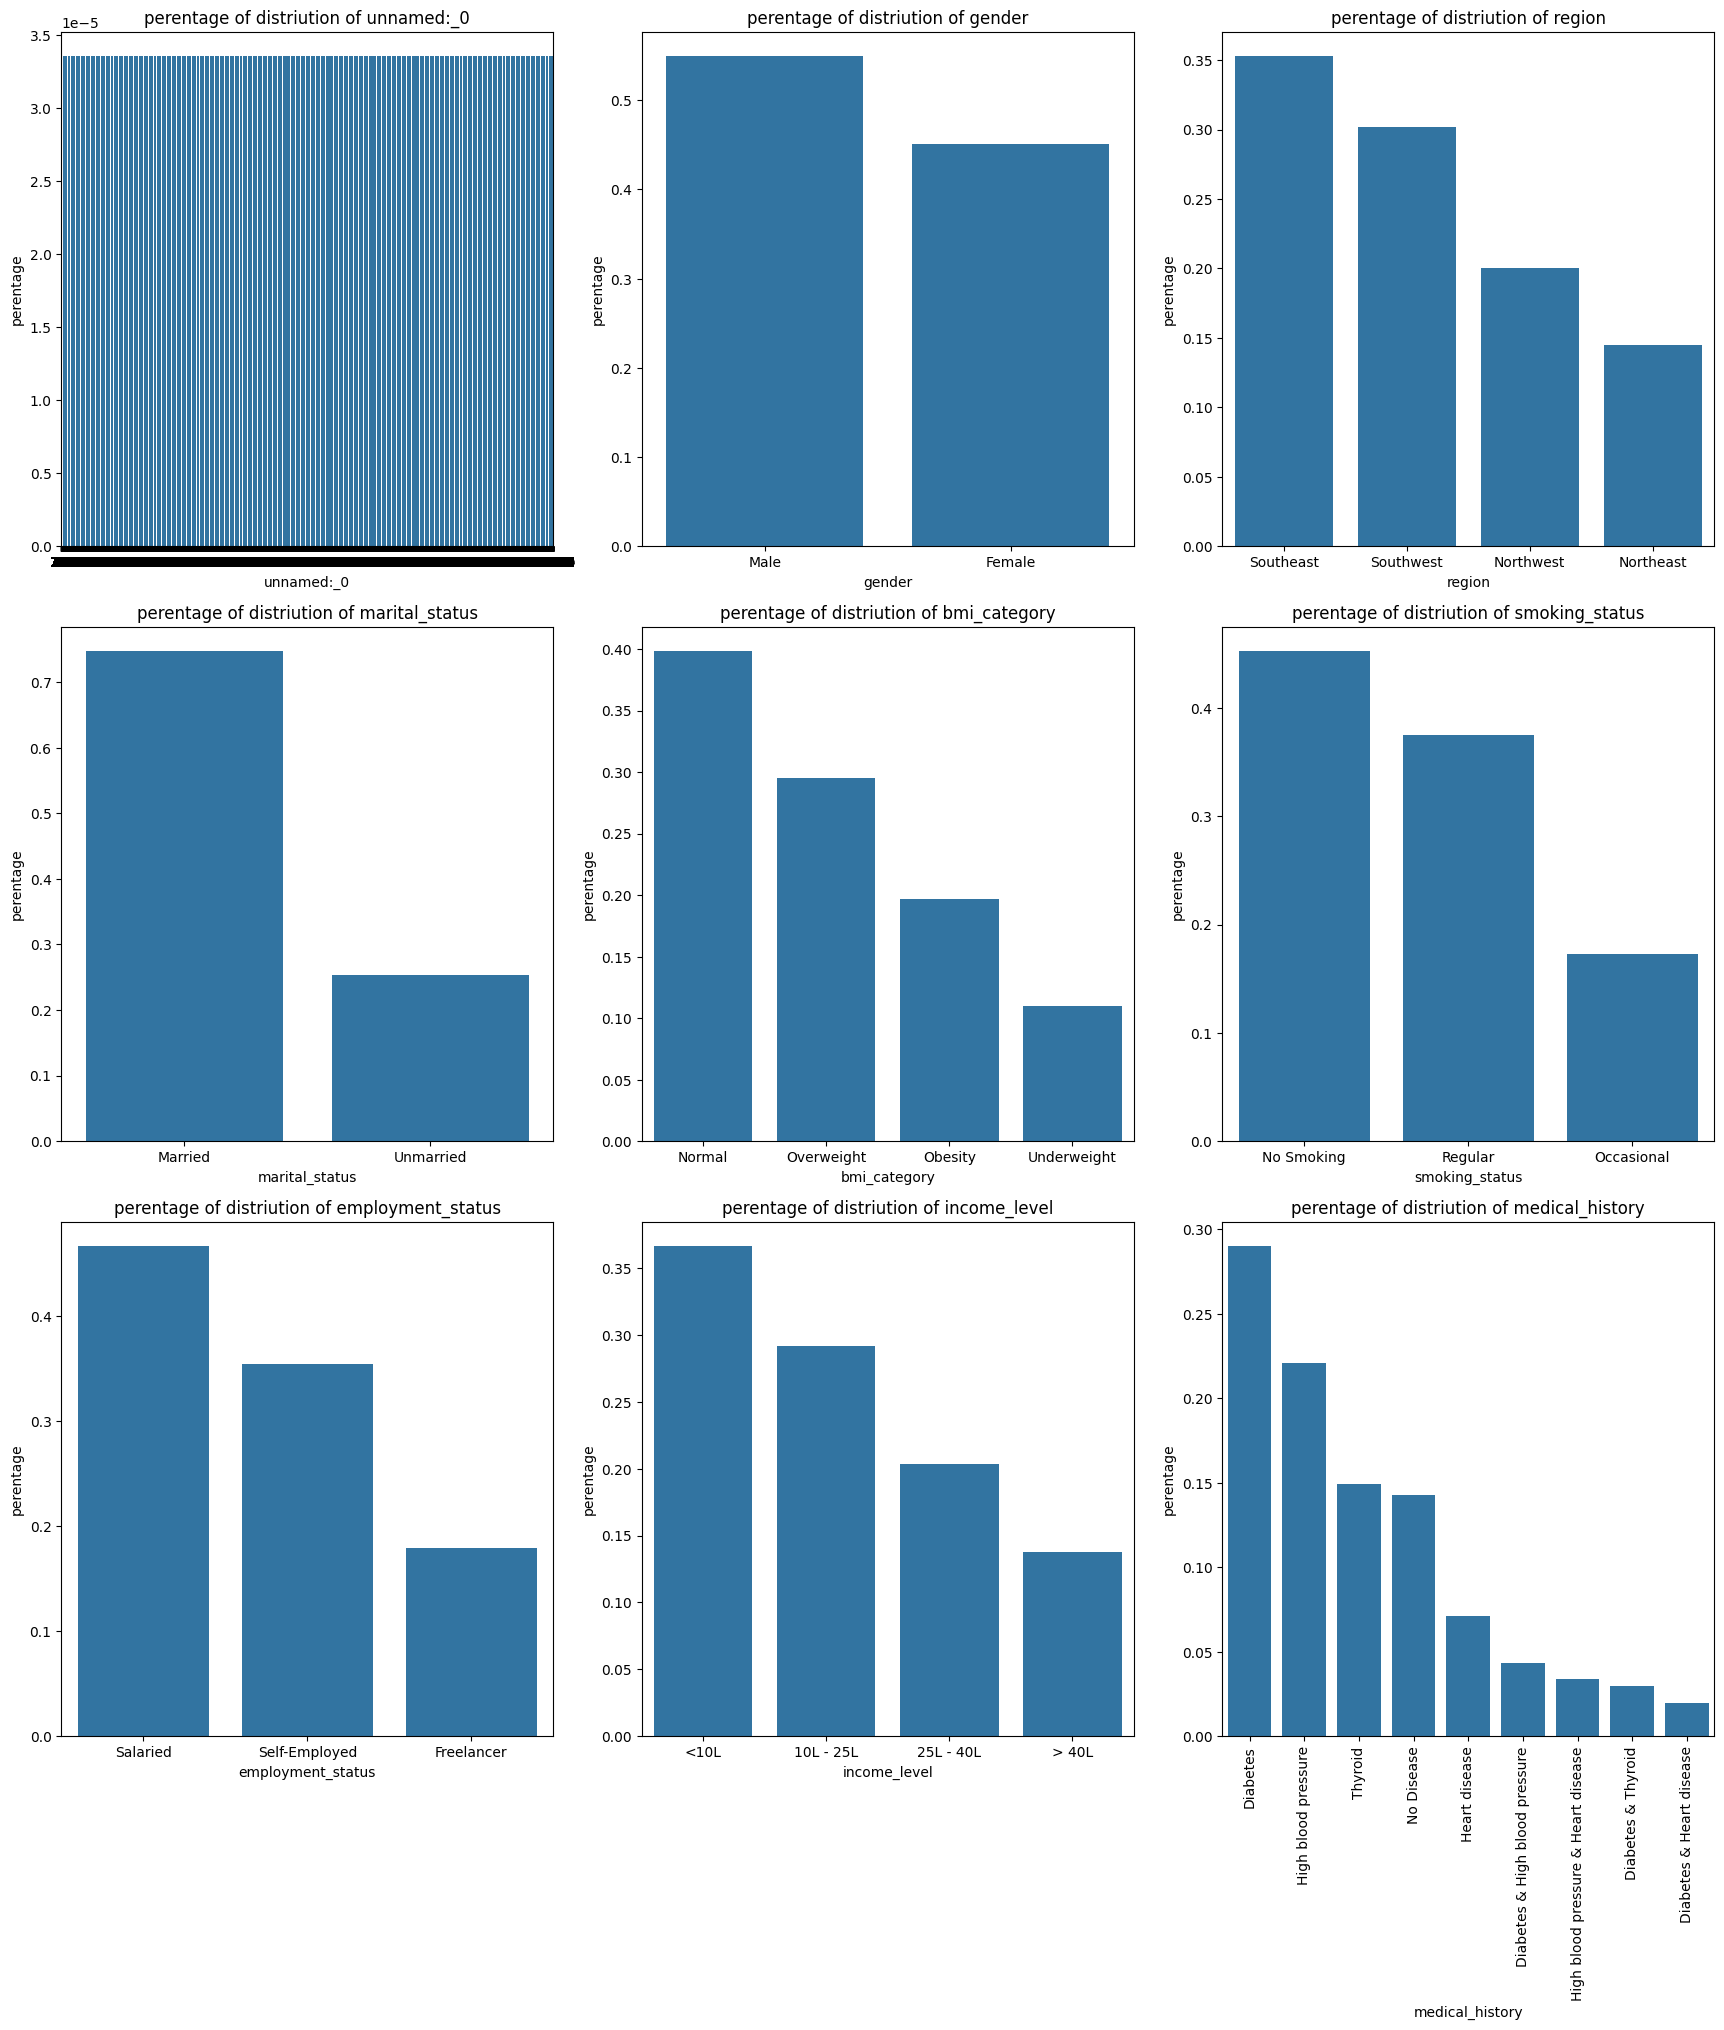

In [26]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
ax=axes.flatten()
for col,ax in zip(categorical_col,ax):
    category_counts=df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'perentage of distriution of {col}')
    
    ax.set_ylabel('perentage')
    ax.set_xlabel(col)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
    

<Axes: xlabel='income_level'>

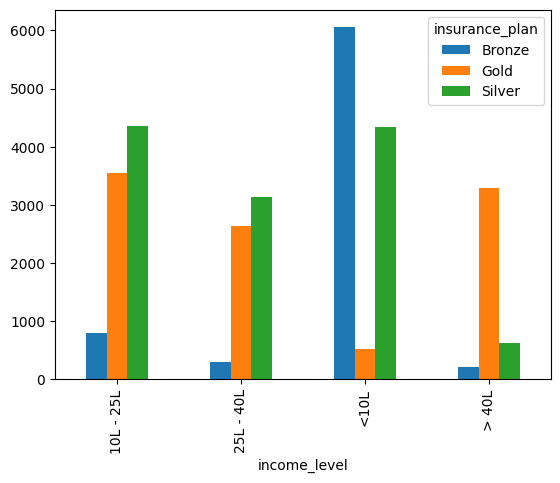

In [27]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab.plot(kind='bar')

In [28]:
df2.medical_history.unique()
df2.sample(5)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
11277,18880,33,Male,Southwest,Married,4,Normal,Regular,Freelancer,<10L,6,Diabetes & Thyroid,Bronze,14585
15396,25806,33,Male,Southeast,Married,3,Normal,Regular,Self-Employed,25L - 40L,38,High blood pressure,Silver,18938
10990,18405,55,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,97,No Disease,Gold,24786
13832,23231,51,Female,Northeast,Unmarried,1,Obesity,No Smoking,Self-Employed,10L - 25L,21,High blood pressure & Heart disease,Gold,35028
5127,8556,44,Male,Southeast,Married,5,Obesity,Regular,Salaried,<10L,2,High blood pressure,Bronze,16528


In [29]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,None


In [30]:
df2.fillna({'disease1':'none'},inplace=True)
df2.fillna({'disease2':'none'},inplace=True)
# df2['disease1'].replace('diabetes ','diabetes',inplace=True)
df2['total_risk_score']=0
df2['total_risk_score'] = df2['disease1'].map(risk_scores) + df2['disease2'].map(risk_scores)
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [31]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [32]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3])

In [33]:
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,no disease,none,0,0.000000
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,diabetes,none,6,0.428571


In [34]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [35]:
df2['income_level']=df2['income_level'].map({'<10L':1,'10L - 25L':2,'> 40L':4, '25L - 40L':3})
df2.income_level.unique()

array([1, 2, 4, 3])

In [36]:
nominal_columns=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)
df3.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,26,0,1,6,Diabetes,1,9053,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,1,29,2,1,6,Diabetes,1,16339,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,3,30,3,4,77,No Disease,3,20303,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,5,56,3,2,14,Diabetes,1,15610,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [37]:
df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,5,56,3,2,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


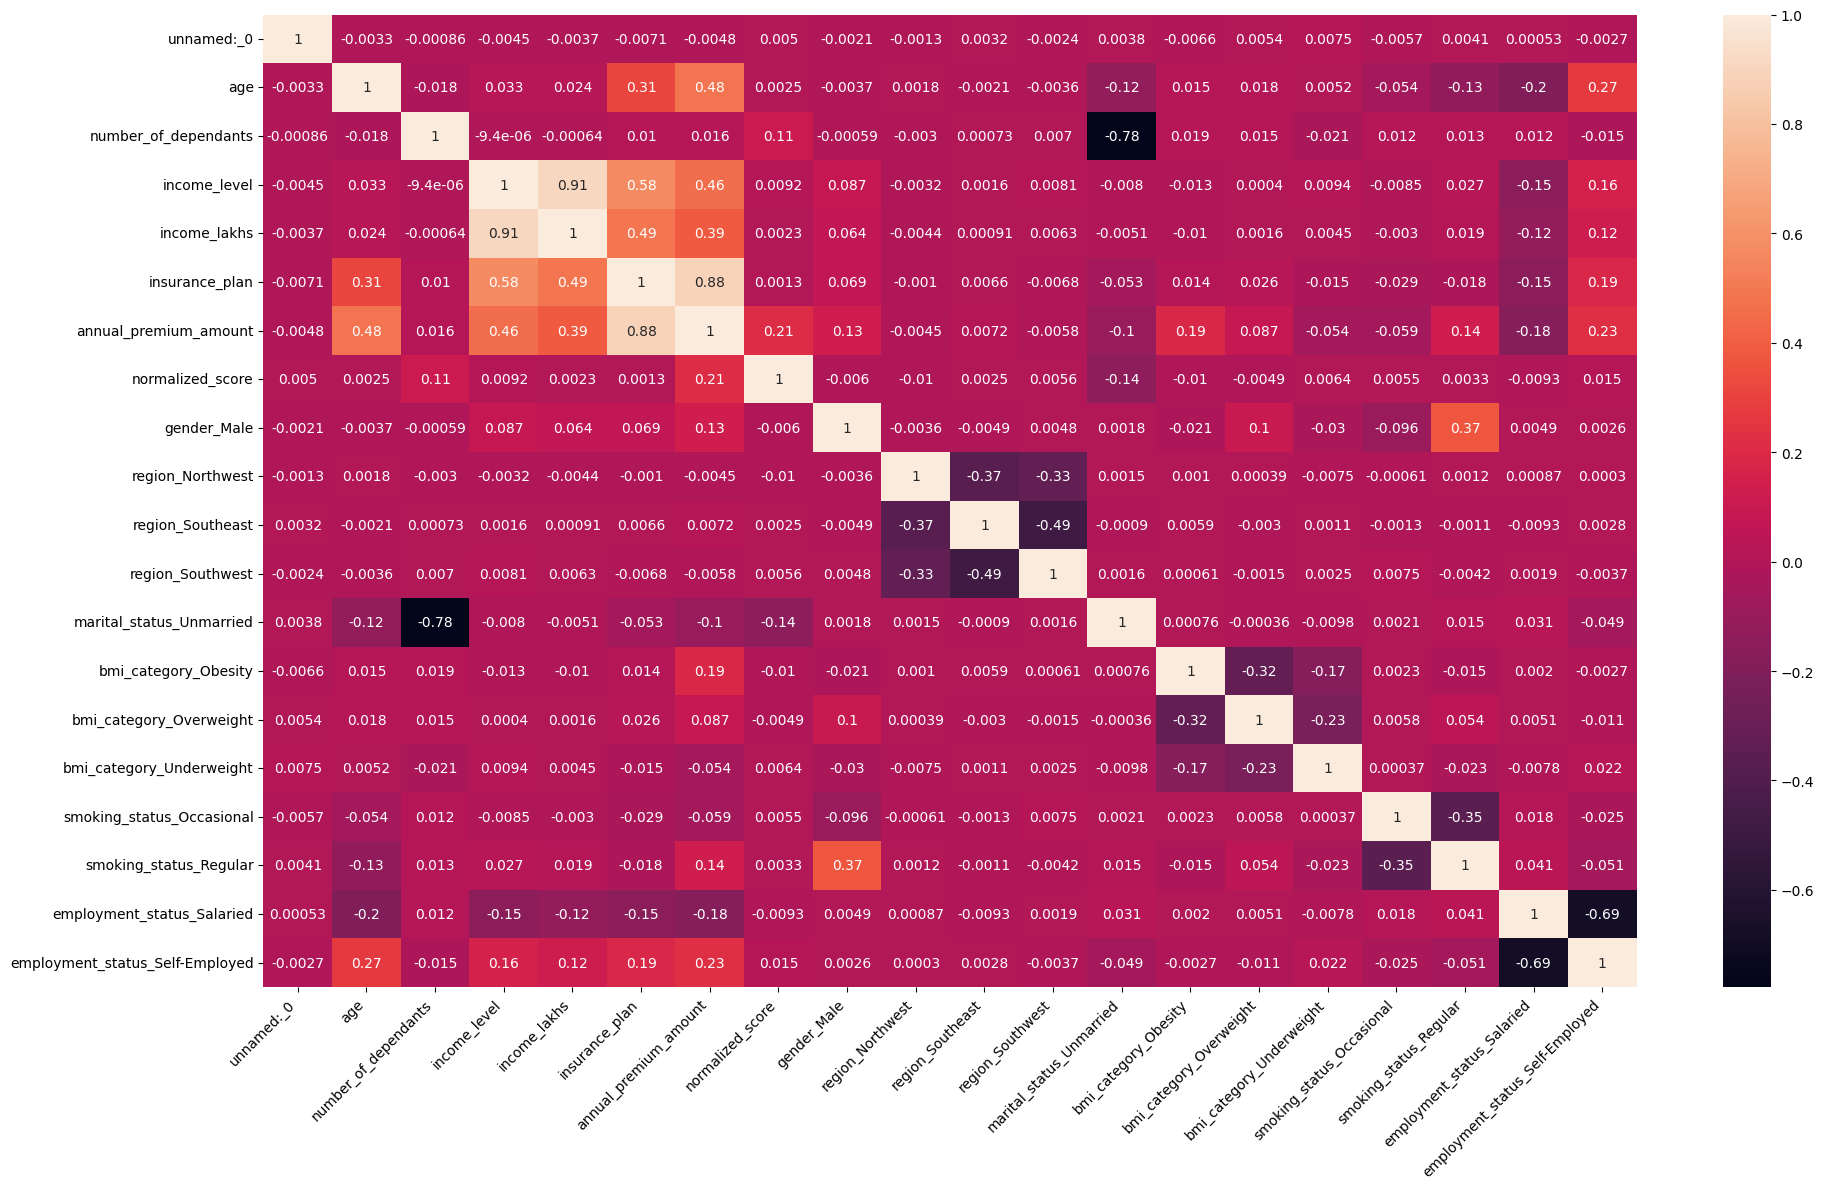

In [38]:
cm=df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
X=df4.drop('annual_premium_amount',axis="columns")
y=df4['annual_premium_amount']
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,25030.357152,0.371628,0.477547,0.371225,0.224509,0.544112,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,14431.397026,0.240053,0.284129,0.351111,0.226822,0.379009,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12605.250000,0.173913,0.200000,0.000000,0.060606,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25070.000000,0.347826,0.600000,0.333333,0.161616,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37565.500000,0.565217,0.600000,0.666667,0.313131,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,49999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

                   
calculate_vif(X)

,Column,VIF
0,unnamed:_0,3.708010
1,age,3.957380
2,number_of_dependants,6.574054
3,income_level,13.890759
4,income_lakhs,11.186315
5,insurance_plan,5.272795
6,normalized_score,3.847203
7,gender_Male,2.600903
8,region_Northwest,2.143527
9,region_Southeast,3.016241


In [41]:
X_reduecd=X.drop('income_level',axis="columns")
X_reduecd.head()

,unnamed:_0,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,5,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


#### MODEL TRAINING

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score=model_lr.score(X_train,y_train)
train_score,test_score

(0.9534843405214133, 0.9538973324696579)

In [43]:
model_lr.intercept_

5925.624880853469

In [44]:
model_lr.coef_

array([ 6.81366919e-04,  6.98274062e+03, -1.31339704e+03, -4.14247889e+02,
       -1.87883154e+02,  1.49083064e+04,  6.05738836e+03,  4.34424575e+01,
       -5.28513862e+01, -1.79930245e+01, -1.94498886e+01, -7.01608837e+02,
        3.92475075e+03,  1.97712533e+03,  6.16017843e+02,  8.37197183e+02,
        2.80240066e+03, -5.38980869e+01,  2.47869236e+02])

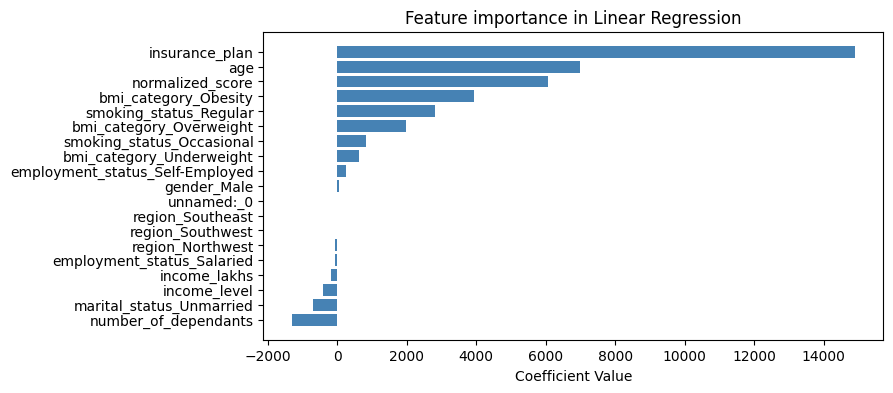

In [45]:
feature_importances=model_lr.coef_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [46]:
model_r=Ridge()
model_r.fit(X_train,y_train)
test_score=model_r.score(X_test,y_test)
train_score=model_r.score(X_train,y_train)
train_score,test_score

(0.9534841664350948, 0.9538986812809216)

In [47]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score=model_xgb.score(X_train,y_train)
train_score,test_score

(0.9987491369247437, 0.9979490637779236)

In [48]:
y_pred=model_xgb.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)
rmse_xgb

311.51344872577926

In [49]:
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
random_search.fit(X_train,y_train)
random_search.best_score_

/home/yashwanth/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9980647563934326

In [50]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}

In [51]:
best_model=random_search.best_estimator_

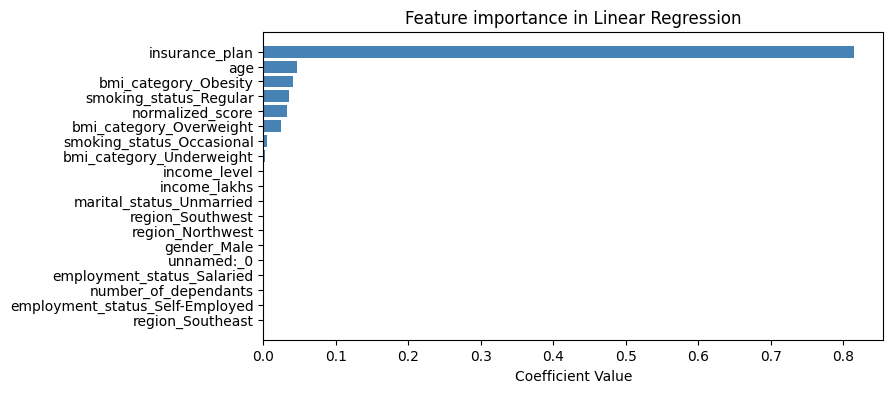

In [52]:
feature_importances=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

### ERROR ANLYSIS

In [53]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct = residuals*100/y_test
results_df=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':residuals,'diff_pct':residuals_pct})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26558.357422,-336.642578,-1.251692
14750,22734,22980.861328,246.861328,1.085868
19932,21198,21574.570312,376.570312,1.776443
29643,9100,9086.573242,-13.426758,-0.147547
17076,26434,26561.738281,127.738281,0.483235


<Axes: xlabel='diff_pct', ylabel='Count'>

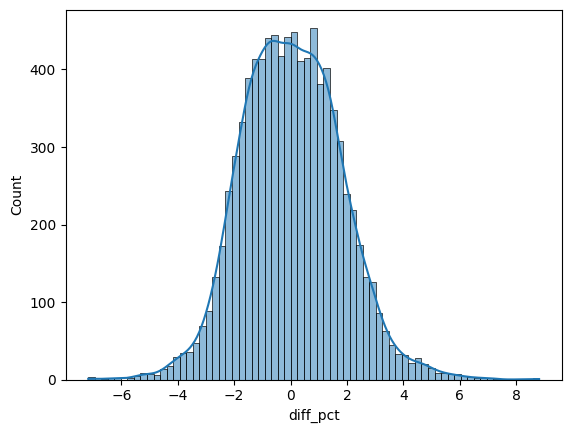

In [54]:
sns.histplot(results_df['diff_pct'],kde=True)

In [55]:
error_threshold=10
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>error_threshold]
extreme_resutls_df

,actual,predicted,diff,diff_pct


In [56]:
extreme_error_pct=extreme_resutls_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.0

In [57]:
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)
extreme_resutls_df

,actual,predicted,diff,diff_pct


In [58]:
extreme_error_df=X_test.loc[extreme_resutls_df.index]
extreme_error_df.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


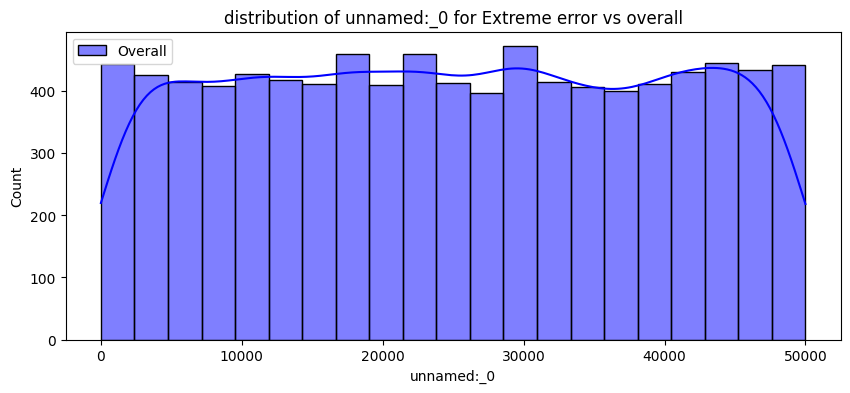

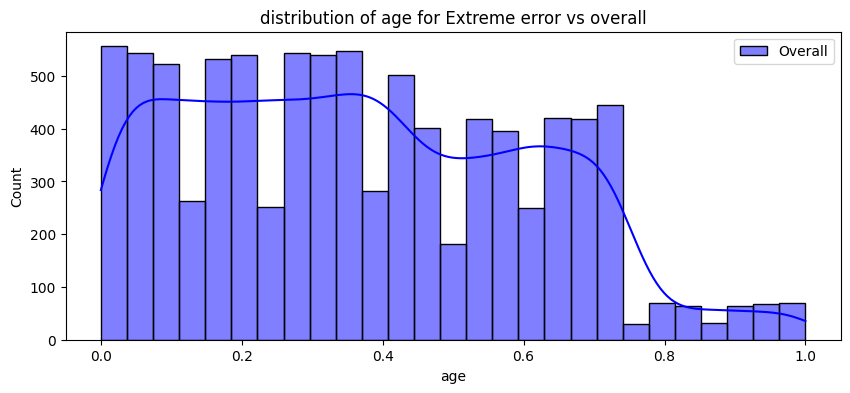

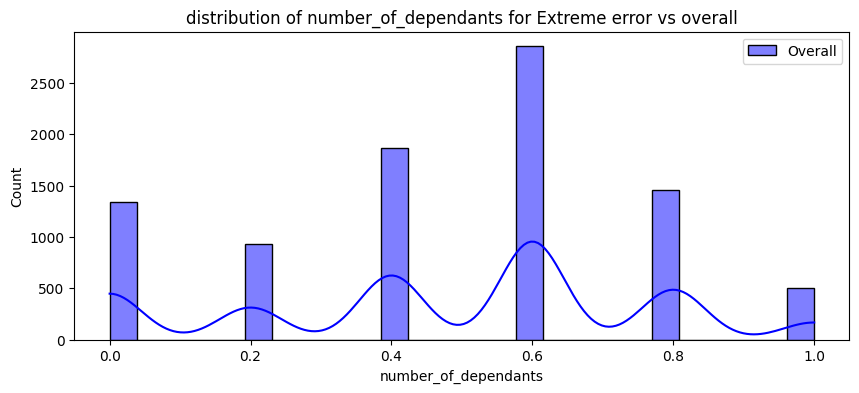

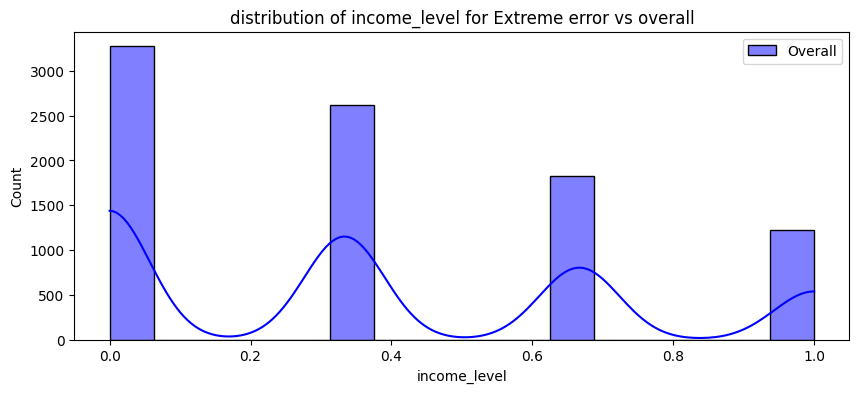

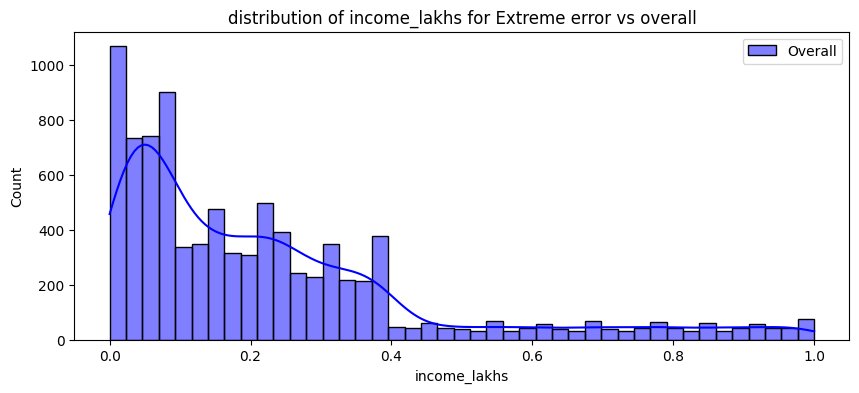

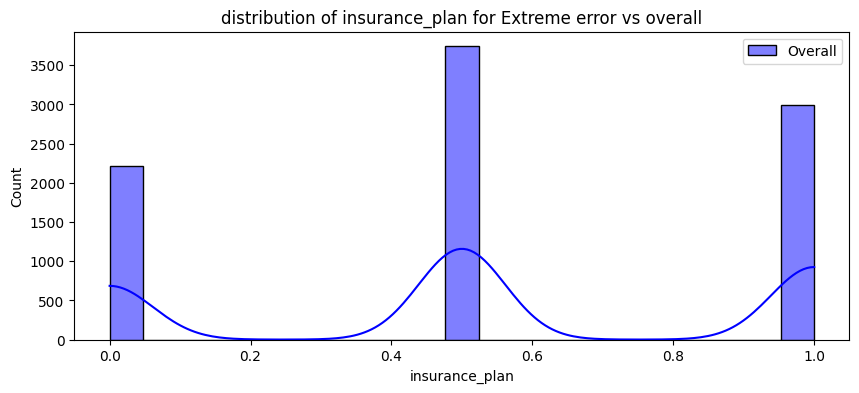

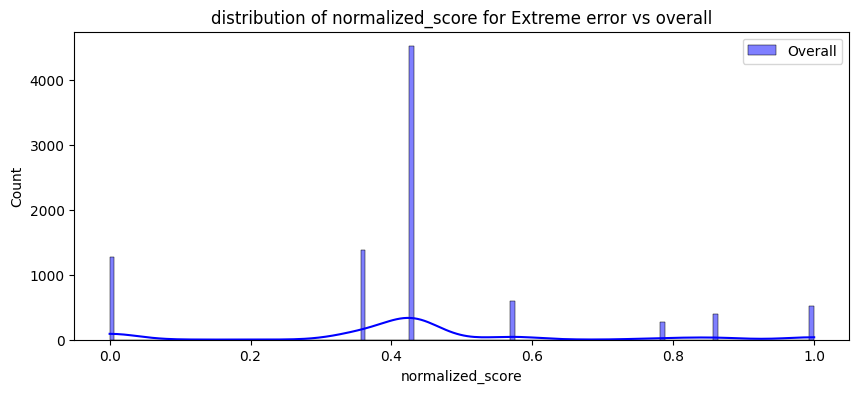

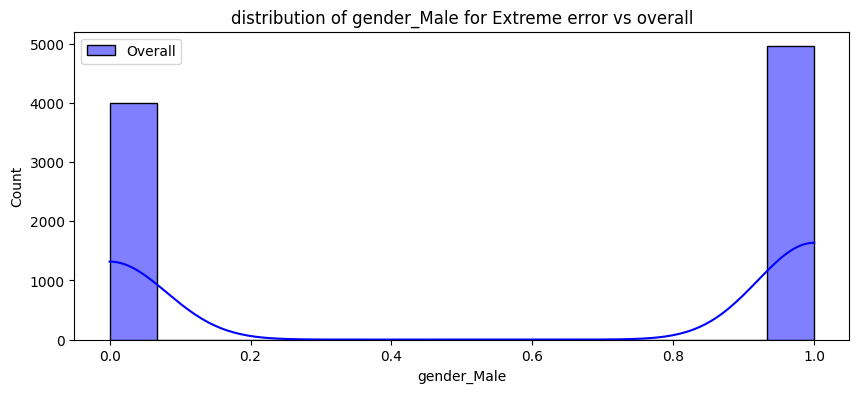

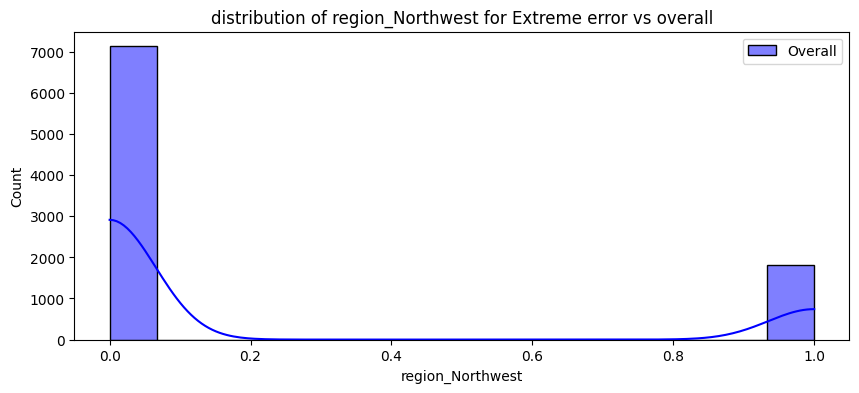

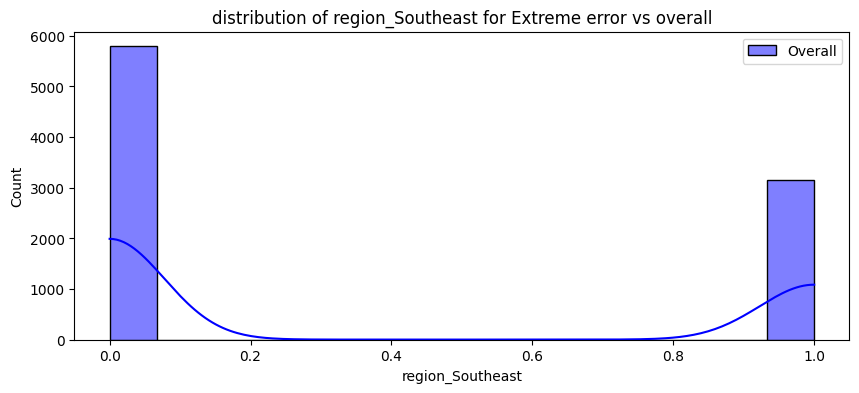

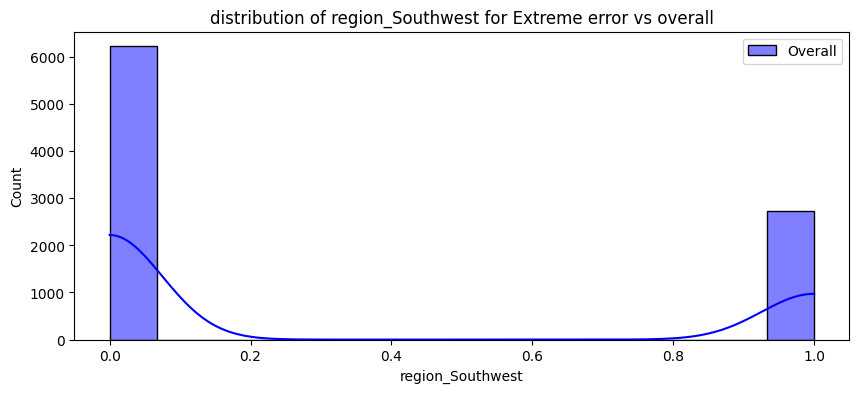

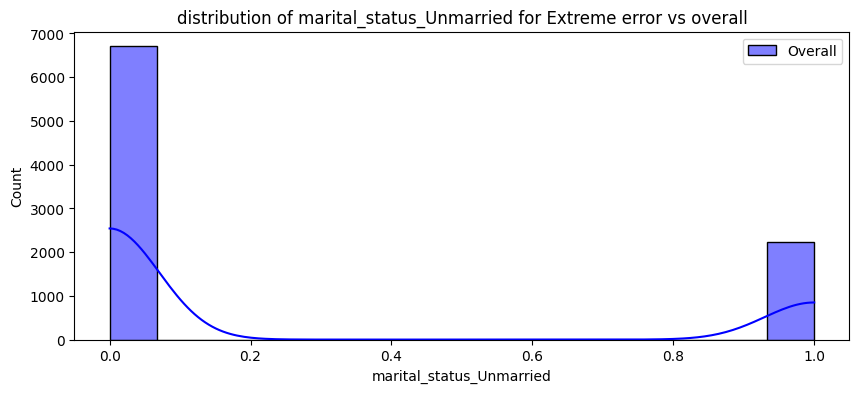

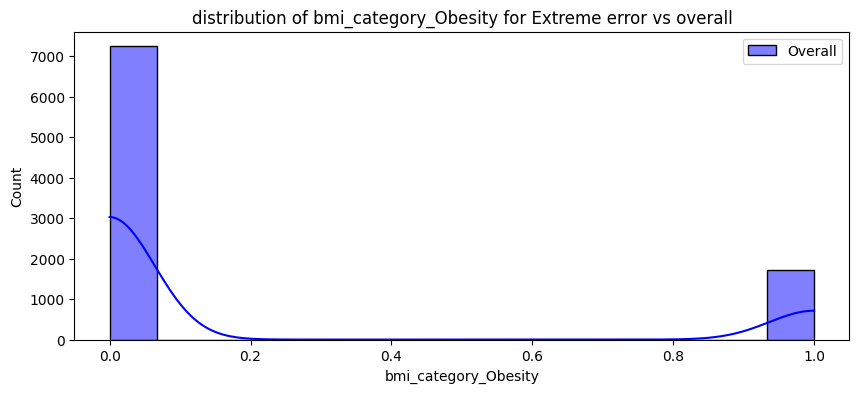

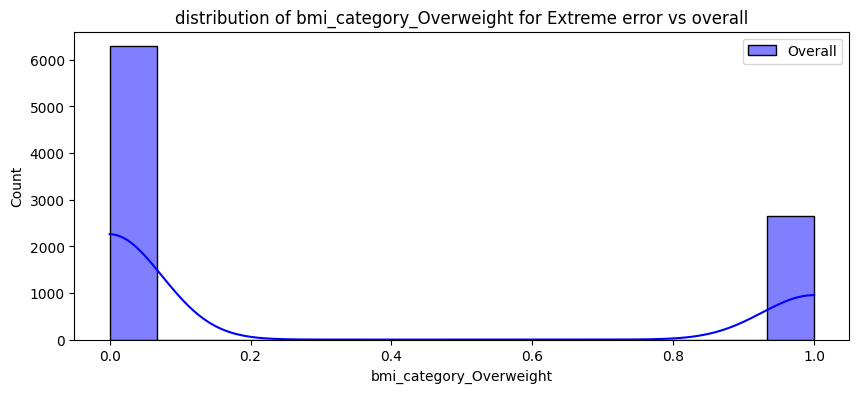

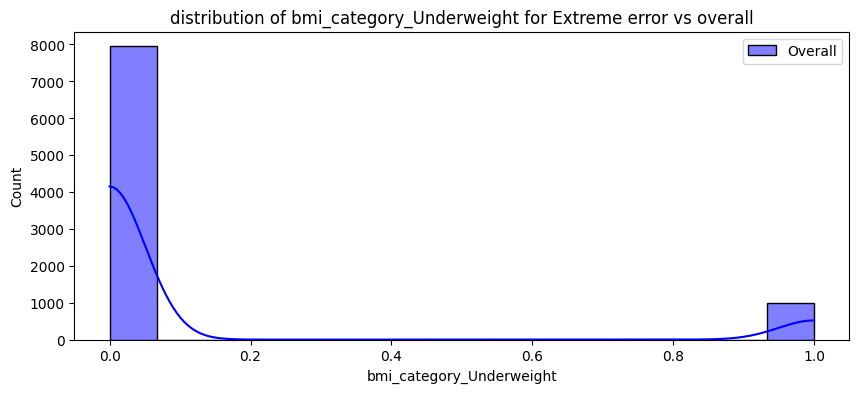

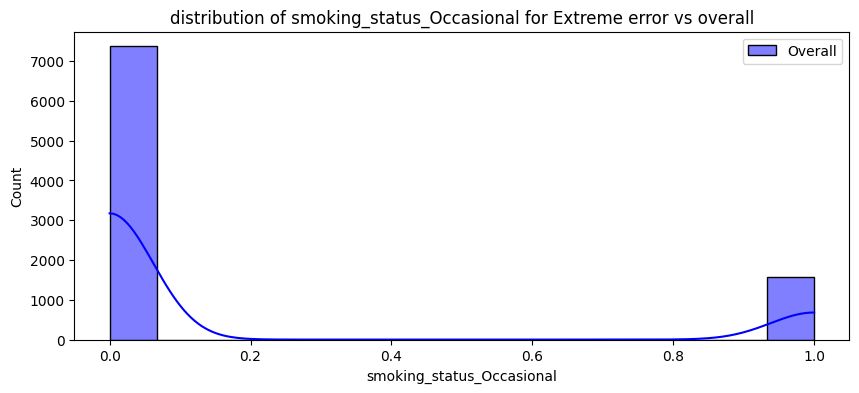

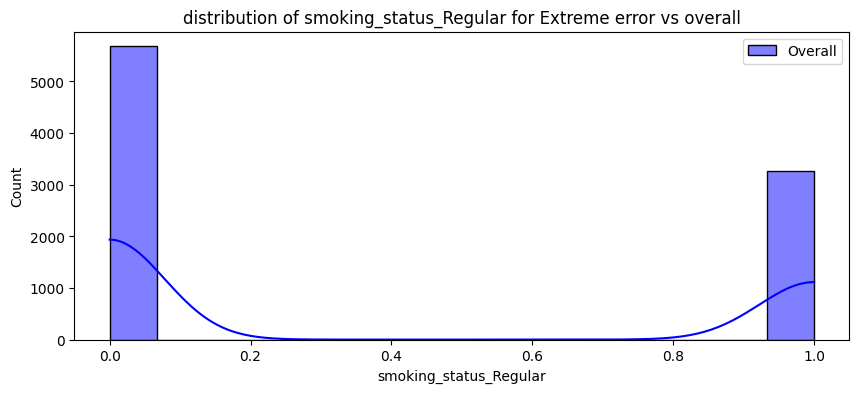

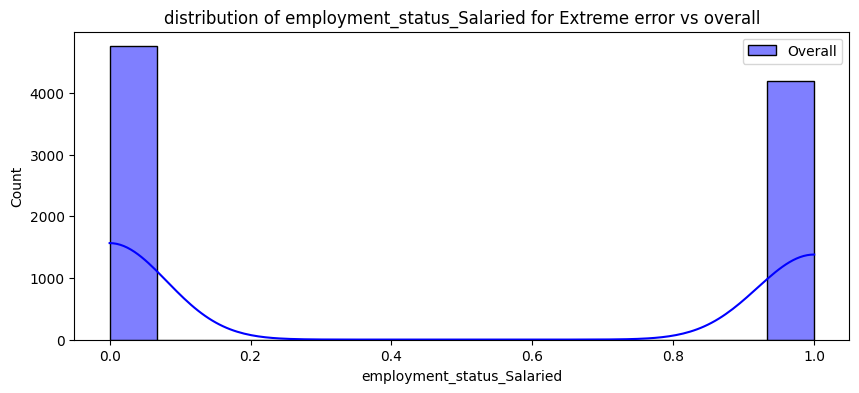

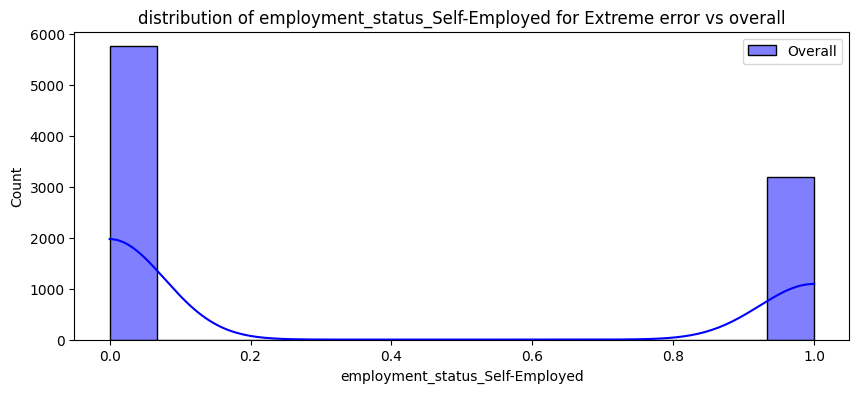

In [59]:
for feature in X_test.columns:
        plt.figure(figsize=(10,4))
        
        sns.histplot(X_test[feature],label="Overall",color='blue',alpha=0.5,kde=True)
        sns.histplot(extreme_error_df[feature],label="Extreme Errors",color='red',kde=True)
        plt.title(f'distribution of {feature} for Extreme error vs overall')
        plt.legend()
        plt.show()

In [60]:
extreme_error_df.columns,cols_to_scale

(Index(['unnamed:_0', 'age', 'number_of_dependants', 'income_level',
        'income_lakhs', 'insurance_plan', 'normalized_score', 'gender_Male',
        'region_Northwest', 'region_Southeast', 'region_Southwest',
        'marital_status_Unmarried', 'bmi_category_Obesity',
        'bmi_category_Overweight', 'bmi_category_Underweight',
        'smoking_status_Occasional', 'smoking_status_Regular',
        'employment_status_Salaried', 'employment_status_Self-Employed'],
       dtype='object'),
 ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan'])

In [61]:
extreme_error_df['income_level']=-1
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [ ]:
sns.histplot(df_reversed.age,kde=True)

In [ ]:
df_reversed.describe()